# Mixed Membership Stochastic Blockmodel(MMSBM)

In [8]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

A [Stochaistic Block Model(SBM)](./sbm.ipynb) produces graphs containing communities: disjoint subgraphs characterized by differing edge probabilities for vertices within and between communities. 

Given a network with $k$ number of communities, a SBM is parametrized by the number of vertices in each community $n$; a block connectivity matrix	$B\in R^{kxk}$ where each $(i^{th}, j^{th})$ entry specifies the probability of connection between nodes pertaining to the $i^{th}$ community and the $j^{th}$ community; and a membership matrix $Z\in R^{nxk}$ in which the $i^{th}$ row vector contains information regarding which of the $k$ communities the node $i$ pertains to. In fact, for any $i^{th}$ row of $Z$ each $j^{th}$ entry indicates the probability of the node $i$ pertaining to the community $j$. Each edge between nodes is then sampled from Bernoulli distribution according to a probability matrix $P\in R^{nxn}$ such that $P$ = $Z B Z^{T}$ and each $(i^{th}, j^{th})$ entry indicates the probability of connection between node $i$ and $j$.

One drawback of utilizing SBM is that each node must be assigned exclusevily to a single community. Therefore each row of $Z$ contains $1$ in the $j^{th}$ column indicating the community to which that node belongs to and $0$ for all the other entries. 

The Mixed Membership Stochaistic Block Model(MMSBM) addresses this issue by adding some variability in the community assignment process to each node. Indeed, given a network with $k$ communities and a connectivity matrix $B\in R^{kxk}$ each node $p$ is assigned a membership vector $\vec{\pi}_p$. As aforementioned, the $i^{th}$ entry of this vector indicates the probability of node $p$ pertaining to the $i^{th}$ community when interactong with another node. Differently from SBM, a node is allowed to pertain to multiple communities. This is achieved by estimating how often a node act as belonging to a community with respect to another when forming connections with other nodes. For example consider:

\begin{align*}
\vec{\pi}_p &= \begin{bmatrix} 1 & 0 & 0 & 0 \end{bmatrix}\\
\vec{\pi}_q &= \begin{bmatrix} 0.25 & 0.25 & 0.25 & 0.25 \end{bmatrix}\\
\end{align*}

According to $\vec{\pi}_p$, node $p$ will always behave as pertaining to the first community when interacting with other nodes, while node $q$ will interact 25% of the time as if belonging to community 1, 25% of the time as if belonging to community 2, etc.

In MMSBM, this memership assignment is performed by sampling each membership vector $\vec{\pi}_p$ from a Dirichlet distribution with concentration parameter $\alpha$ so that by modifying $\alpha$ we can control the shape of the Dirichlet distribution and thus inderectly the assigned membership vectors. For example, when one of the entries in alpha is much greater than the others, the majority of the nodes will pertain to the community associated with that entry. If all entries of $\alpha$ are identical to each other then values of the concentration parameter closer to $0$ will cause most of the nodes to belong in only one community similarly to an SBM. Always maintaining all entries identical, as we increse the values in $\alpha$ more nodes are allowed to pertain to multiple communities, therefore the underlying block structure is progressively lost.

To show this we sample a four-block SBM(undirected, no self-loops) graph with following parameters:
\begin{align*}
k &= 4\\
n &= \begin{bmatrix} 50 & 50 & 50 & 50 \end{bmatrix}\\
B &=\begin{bmatrix} 0.8 & 0.2 & 0.2 & 0.2 \\ 0.2 & 0.8 & 0.2 & 0.2 \\ 0.2 & 0.2 & 0.8 & 0.2 \\ 0.2 & 0.2 & 0.2 & 0.8 \end{bmatrix}
\end{align*}

Similarly, we also sample from MMSBM a graph with the same number of communities, same connectivity matrix and same total number of vertices:
\begin{align*}
n &=200\\
k &= 4\\
\alpha &= \begin{bmatrix} 0 & 0 & 0 & 0 \end{bmatrix}\\
B &=\begin{bmatrix} 0.8 & 0.2 & 0.2 & 0.2 \\ 0.2 & 0.8 & 0.2 & 0.2 \\ 0.2 & 0.2 & 0.8 & 0.2 \\ 0.2 & 0.2 & 0.2 & 0.8 \end{bmatrix}
\end{align*}

Note that, differently from SBM, for the MMSBM we do not specify the number of vertices pertaining to each specific block as the assignment is performed via random sampling from Dirichlet distribution.


In [9]:
from graspologic.simulations import sbm, MMsbm
seed = 1

rng = np.random.default_rng(seed)
np.random.seed(seed)

n = [50] * 4
p = [[0.8,0.2,0.2,0.2],
    [ 0.2,0.8,0.2,0.2],
    [ 0.2,0.2,0.8,0.2],
    [ 0.2,0.2,0.2,0.8]]

G_sbm = sbm(n, p, directed=False, loops=False)

n= 200
k = 4
alpha = np.zeros(4)

G_mmsbm = MMsbm(n, p, alpha= alpha, rng = rng)

# Plot SBM and MMSBM graphs using heatmap

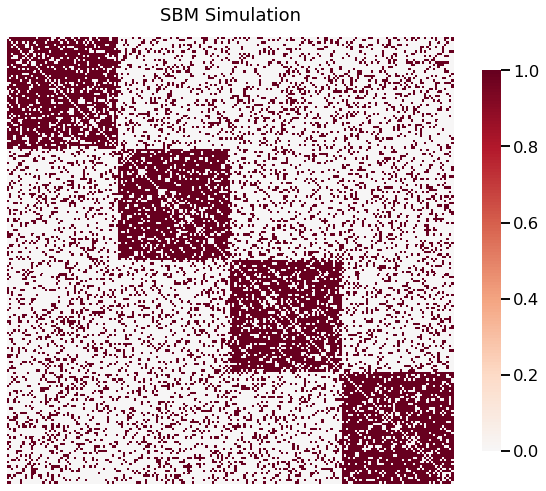

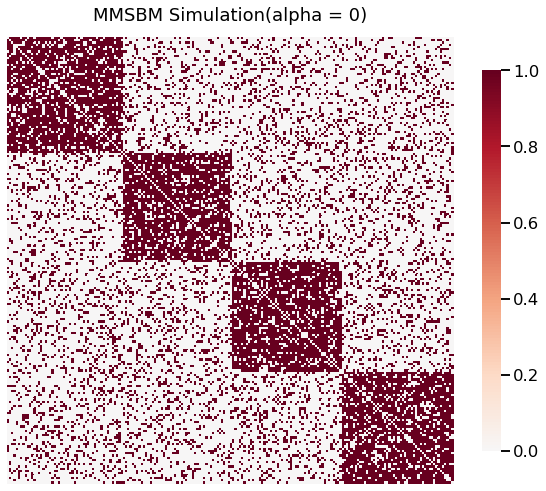

In [10]:
from graspologic.plot import heatmap

heatmap(G_sbm, title ='SBM Simulation')
heatmap(G_mmsbm, title ='MMSBM Simulation(alpha = 0)');

As expected, the two graphs appear to be generated from a four-block SBMs with connectivity matrix $B$. In the MMSBM case, the number of nodes assigned to each block is randomly sampled from the Dirichlet distribution compared to the SBM in which it is specified.

Now let's try increasing the values of each entry of the concentration parameter $\alpha$ first to $0.25$, then $0.5$ and finally to $1$.

First increase alpha to: [0.25 0.25 0.25 0.25]
Then increase alpha to: [0.5 0.5 0.5 0.5]
Finally increase alpha to: [1. 1. 1. 1.]


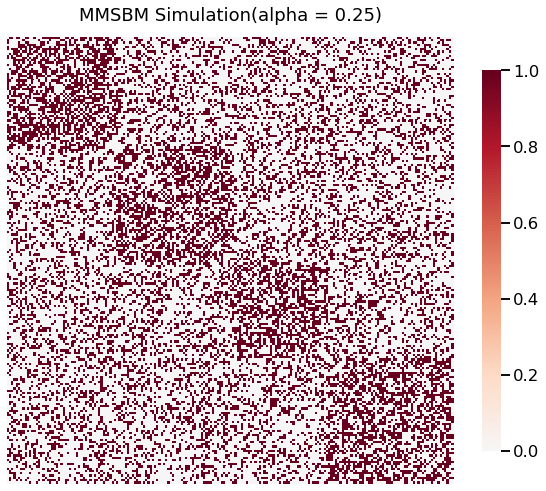

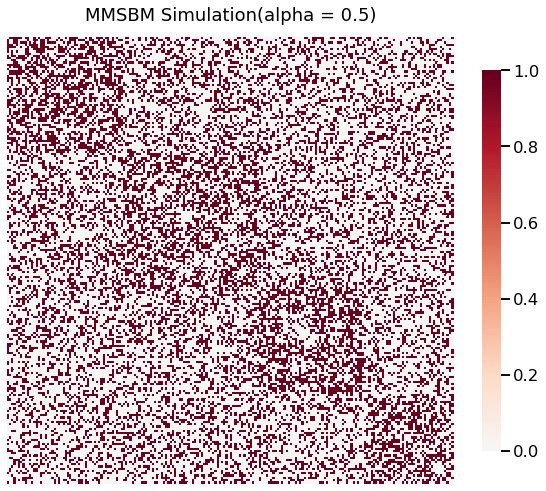

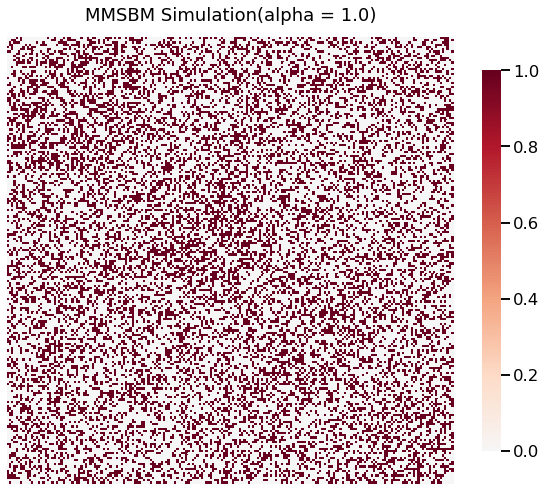

In [11]:
alpha = 0.25*np.ones(k)
print("First increase alpha to: " + str(alpha))

G_mmsbm_25 = MMsbm(n, p, alpha= alpha, rng = rng)
heatmap(G_mmsbm_25, title ='MMSBM Simulation(alpha = 0.25)')

alpha = 0.5*np.ones(k)
print("Then increase alpha to: " + str(alpha))

G_mmsbm_50 = MMsbm(n, p, alpha= alpha, rng = rng)
heatmap(G_mmsbm_50, title ='MMSBM Simulation(alpha = 0.5)')

alpha = 1.0*np.ones(k)
print("Finally increase alpha to: " + str(alpha))

G_mmsbm_100 = MMsbm(n, p, alpha= alpha, rng = rng)
heatmap(G_mmsbm_100, title ='MMSBM Simulation(alpha = 1.0)');

As expected, as we increase the value of alpha we increase the mixed membership allowed at each node so that the community structure is progressivily lost.